<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy as sp
from scipy import signal
from datetime import timedelta, datetime

# Part 1

The Fourier Series of a function $f(x)$ periodic on the interval $[-T/2, T/2]$ is given by

$$f(x)= a_0 +\sum_{n=1}^{\infty} a_n\cos(2n \pi x/T) +\sum_{n=1}^{\infty} b_n\sin(2n \pi x/T)$$

where

$$a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x) \cos(2n \pi x/T)dx \hspace{10mm} b_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x) \sin(2n \pi x/T)dx \hspace{10mm}$$

for the square wave defined in the problem, all $a_n$'s are zero because the appropriate integral defined above has an odd integrand and is thus zero for all $n$. The $b_n$'s are given by

$$\begin{align}
b_n &= \frac{2}{T}\int_{-T/2}^{0} -\sin(2n \pi x/T)dx + \frac{2}{T}\int_{0}^{T/2} \sin(2n \pi x/T)dx\\ \\
&= \frac{2}{T}\frac{T}{2n \pi} \left[\cos(\frac{2n \pi x}{T}) \right]_{-T/2}^{0}-\frac{2}{T}\frac{T}{2n \pi} \left[\cos(\frac{2n \pi x}{T}) \right]_{0}^{T/2}\\ \\
&= \frac{1}{n\pi}(1-(-1)^n)-\frac{1}{n\pi}((-1)^n-1) \\ \\
& = \frac{2}{n\pi}(1-(-1)^n)
\end{align}$$

It follows that

$$f(x) = \sum_{n=1}^{\infty} \frac{2}{n\pi}(1-(-1)^n) \sin \left(\frac{2n \pi x}{T} \right) $$


# Part 2

Define our time scale for this problem:

In [3]:
T=1

Fourier coefficients and function to get fourier series for $n$ terms:

In [4]:
def a_n(n):
    return 0

def b_n(n):
    return (2/(n*np.pi))*(1-(-1)**n)

def get_fourier(x, n, a_n, b_n):
    fourier = 0*x
    for i in range(1,n+1):
        fourier +=a_n(i)*np.cos(2*i*np.pi/T)+ b_n(i)*np.sin(2*i*np.pi*x/T)
    return fourier

Create our time array:

In [5]:
dt = T/200
x = np.arange(-3*T/2, 3*T/2, dt)

Obtain our Fourier Series:

In [6]:
terms = [1, 2, 5, 10, 100]
fouriers= []

for i in terms:
    fouriers.append(get_fourier(x, i, a_n, b_n))

Plot our Fourier Series:

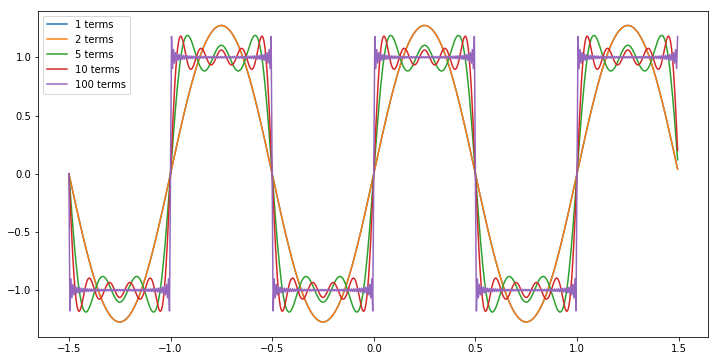

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

for term, fourier in zip(terms, fouriers):
    ax.plot(x, fourier, label='{} terms'.format(term))
    
ax.legend(loc='best')

plt.show()

# Part 3

First we create our array of times.

In [8]:
dt = T/200
x = np.arange(0, 100*T, dt)
N = len(x)

Now we create the Fourier series.

In [9]:
terms = [1, 2, 5, 10, 100]
fouriers= []

for i in terms:
    fouriers.append(get_fourier(x, i, a_n, b_n))

Below we compute the power spectrums.

In [10]:
fourier_100 = fouriers[4]
fourier_5 = fouriers[3]

X100 = np.fft.fft(fourier_100)
X5 = np.fft.fft(fourier_5)
ii1 = range(0,int(N/2))
ii2 = range(0,int(N/2))

# Signal 1
fq1 = np.arange(0, int(N/2), 1)/(N*dt)
Gxx1 = np.abs(X100[ii1])**2 /(N/2)  # divide to normalize

# Signal 2
fq2 = np.arange(0, int(N/2), 1)/(N*dt)
Gxx2 = np.abs(X5[ii2])**2 /(N/2)

**Note:** Half the terms are zero. This is why we only see 3 spikes on the power spectrum for $n=5$ terms.

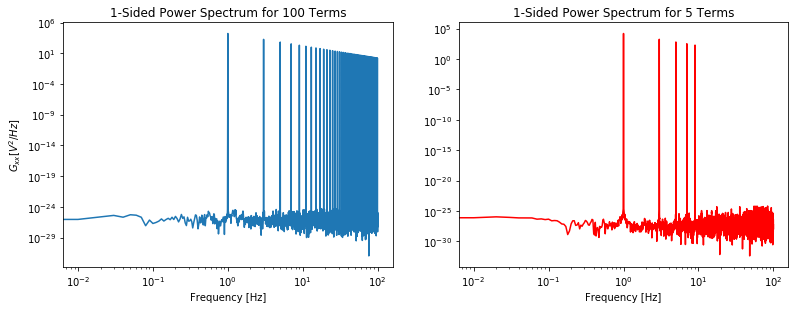

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(13,4.5))
axes[0].loglog(fq1, Gxx1)
axes[1].loglog(fq2, Gxx2, color='r')

axes[0].set_title('1-Sided Power Spectrum for 100 Terms')
axes[0].set_ylabel('$G_{xx}[V^2/Hz]$')
axes[0].set_xlabel('Frequency [Hz]')

axes[1].set_title('1-Sided Power Spectrum for 5 Terms')
axes[1].set_xlabel('Frequency [Hz]')

plt.show()